In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [3]:
data = pd.read_csv(r"C:\Users\amit9\Downloads\archive\CarPrice_Assignment.csv", index_col = 'car_ID')
data.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 25)

# Data Cleaning

## Null Values

In [5]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Duplicate Entries

In [6]:
data.duplicated().sum()

0

## Data types of columns

In [7]:
data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# EDA

In [8]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
data.describe(include = 'O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [11]:
data['CarName'].value_counts()

CarName
toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                    

In [12]:
data['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [13]:
data['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [14]:
data['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [15]:
data['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [16]:
data['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [17]:
data[data['enginelocation'] == 'rear']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


In [18]:
data['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [19]:
data.groupby('CarName')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)[0:10]

,mean
CarName,
buick regal sport coupe (turbo),45400.00
bmw x5,41315.00
buick century special,40960.00
porsche boxter,37028.00
jaguar xk,36000.00
jaguar xf,35550.00
buick skylark,35056.00
buick opel isuzu deluxe,34184.00
porsche cayenne,32714.25


In [20]:
data.groupby('enginetype')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
enginetype,
dohcv,31400.500000
ohcv,25098.384615
dohc,18116.416667
l,14627.583333
ohcf,13738.600000
rotor,13020.000000
ohc,11574.048426


In [21]:
data.groupby('doornumber')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
doornumber,
four,13501.152174
two,12989.924078


In [22]:
data.groupby('enginelocation')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
enginelocation,
rear,34528.000000
front,12961.097361


In [23]:
data.groupby('fueltype')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
fueltype,
diesel,15838.1500
gas,12999.7982


In [24]:
data.groupby('cylindernumber')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
cylindernumber,
eight,37400.100000
twelve,36000.000000
six,23671.833333
five,21630.469727
two,13020.000000
four,10285.754717
three,5151.000000


In [25]:
data.groupby('enginetype')['horsepower'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
enginetype,
dohcv,288.000000
ohcv,169.538462
dohc,146.000000
ohcf,110.400000
rotor,109.500000
l,95.500000
ohc,93.648649


In [26]:
data.groupby('cylindernumber')['horsepower'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
cylindernumber,
twelve,262.000000
eight,193.200000
six,161.916667
five,122.454545
two,109.500000
four,90.547170
three,48.000000


# Data Visualization

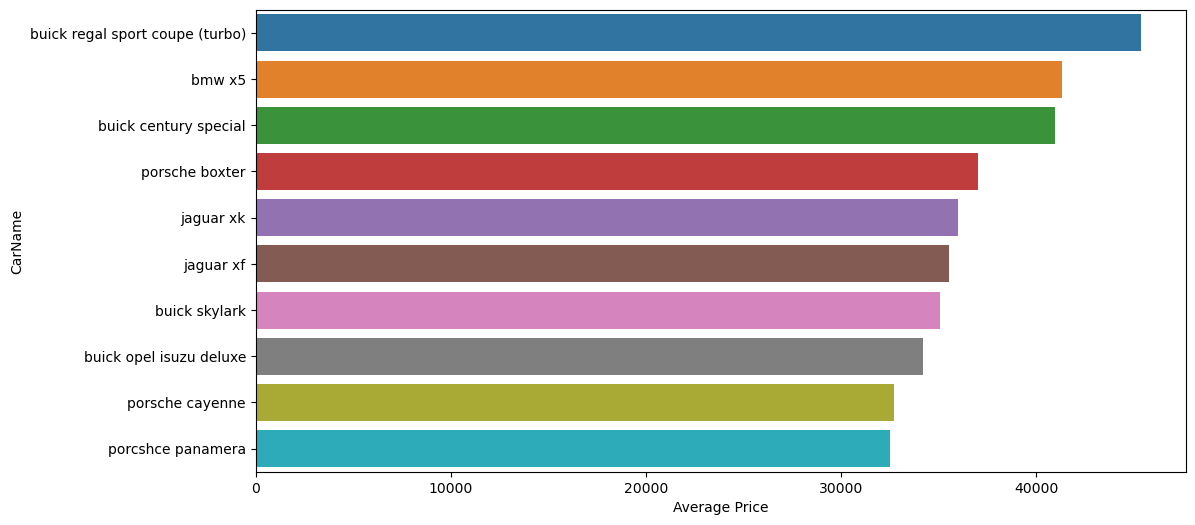

In [27]:
temp = data.groupby('CarName')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)[0:10]

plt.figure(figsize = (12,6))
sns.barplot(data = temp, y = temp.index, x = 'mean')
plt.xlabel('Average Price')
plt.show()

Top 10 cars model in the data given...

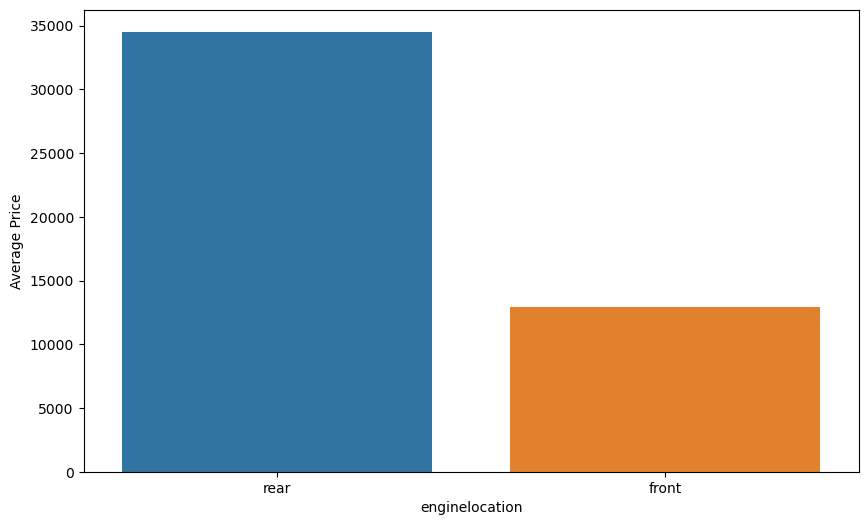

In [28]:
temp = data.groupby('enginelocation')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = temp, x = temp.index, y = 'mean')
plt.ylabel('Average Price')
plt.show()

Cars having engines located at 'Rear' sid e costs more...

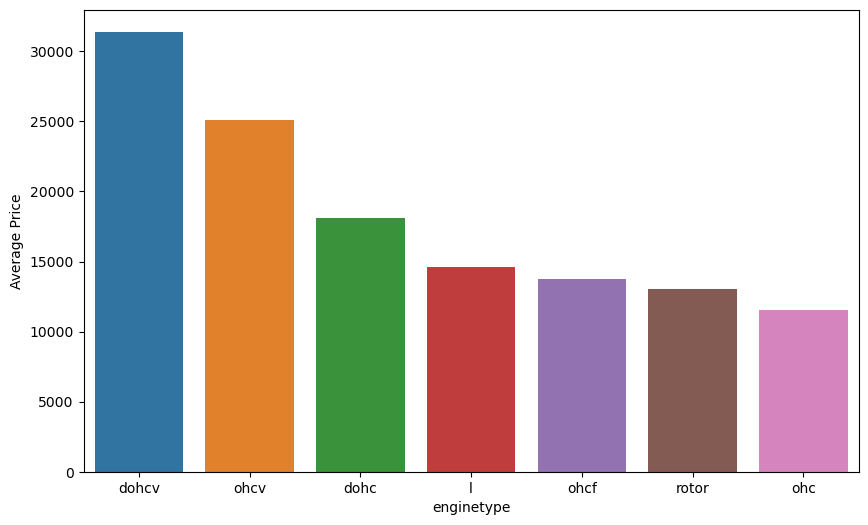

In [29]:
temp = data.groupby('enginetype')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = temp, x = temp.index, y = 'mean')
plt.ylabel('Average Price')
plt.show()

'dohcv' engine is the most expensive one followed by 'ohcv' and 'dohc'

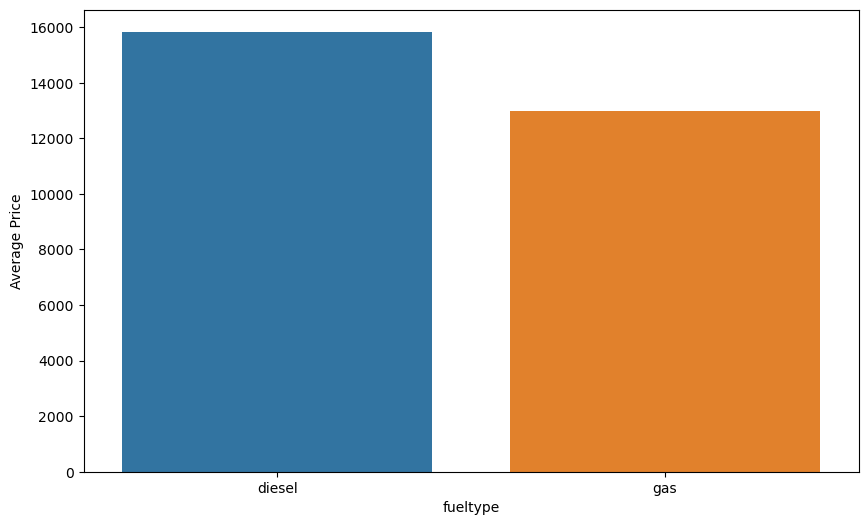

In [30]:
temp = data.groupby('fueltype')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = temp, x = temp.index, y = 'mean')
plt.ylabel('Average Price')
plt.show()

Fuel type doesn't have that much impact but diesel cars costs more because of the cylinder...

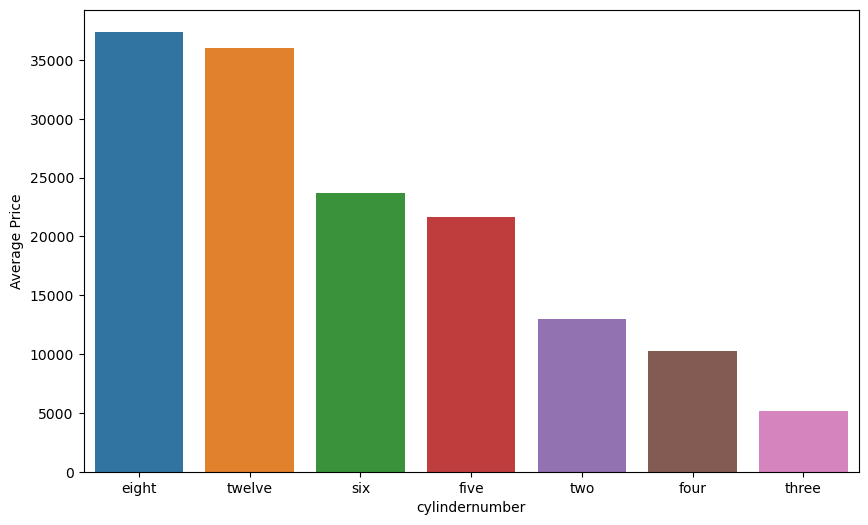

In [31]:
temp = data.groupby('cylindernumber')['price'].agg(['mean']).sort_values(by = 'mean', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = temp, x = temp.index, y = 'mean')
plt.ylabel('Average Price')
plt.show()

Here the car with 8 cylinders costs more than twelve cylinder maybe some other factors are affecting this results such as engine location, fuel type etc...

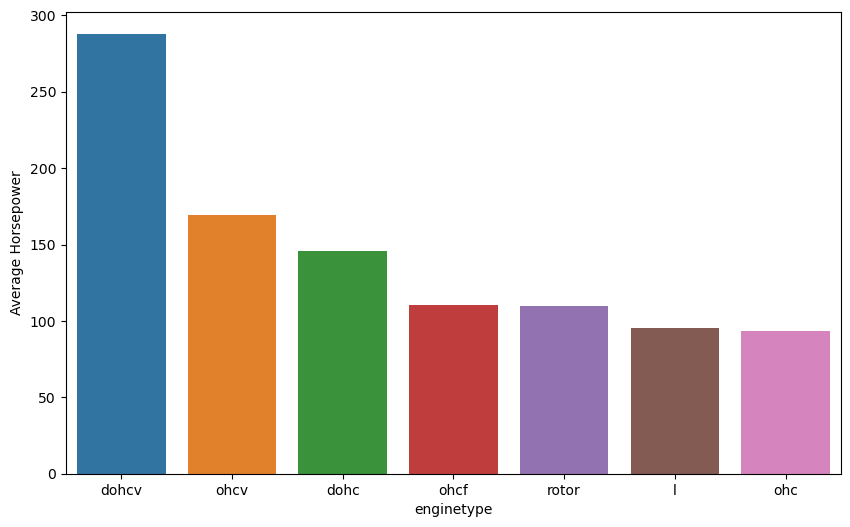

In [32]:
temp = data.groupby('enginetype')['horsepower'].agg(['mean']).sort_values(by = 'mean', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = temp, x = temp.index, y = 'mean')
plt.ylabel('Average Horsepower')
plt.show()

Here the top 3 engine types remain same both in price and horsepower but there is some variation in the rest i.e. I being at fourth place in price listed at second last place in the horsepower...

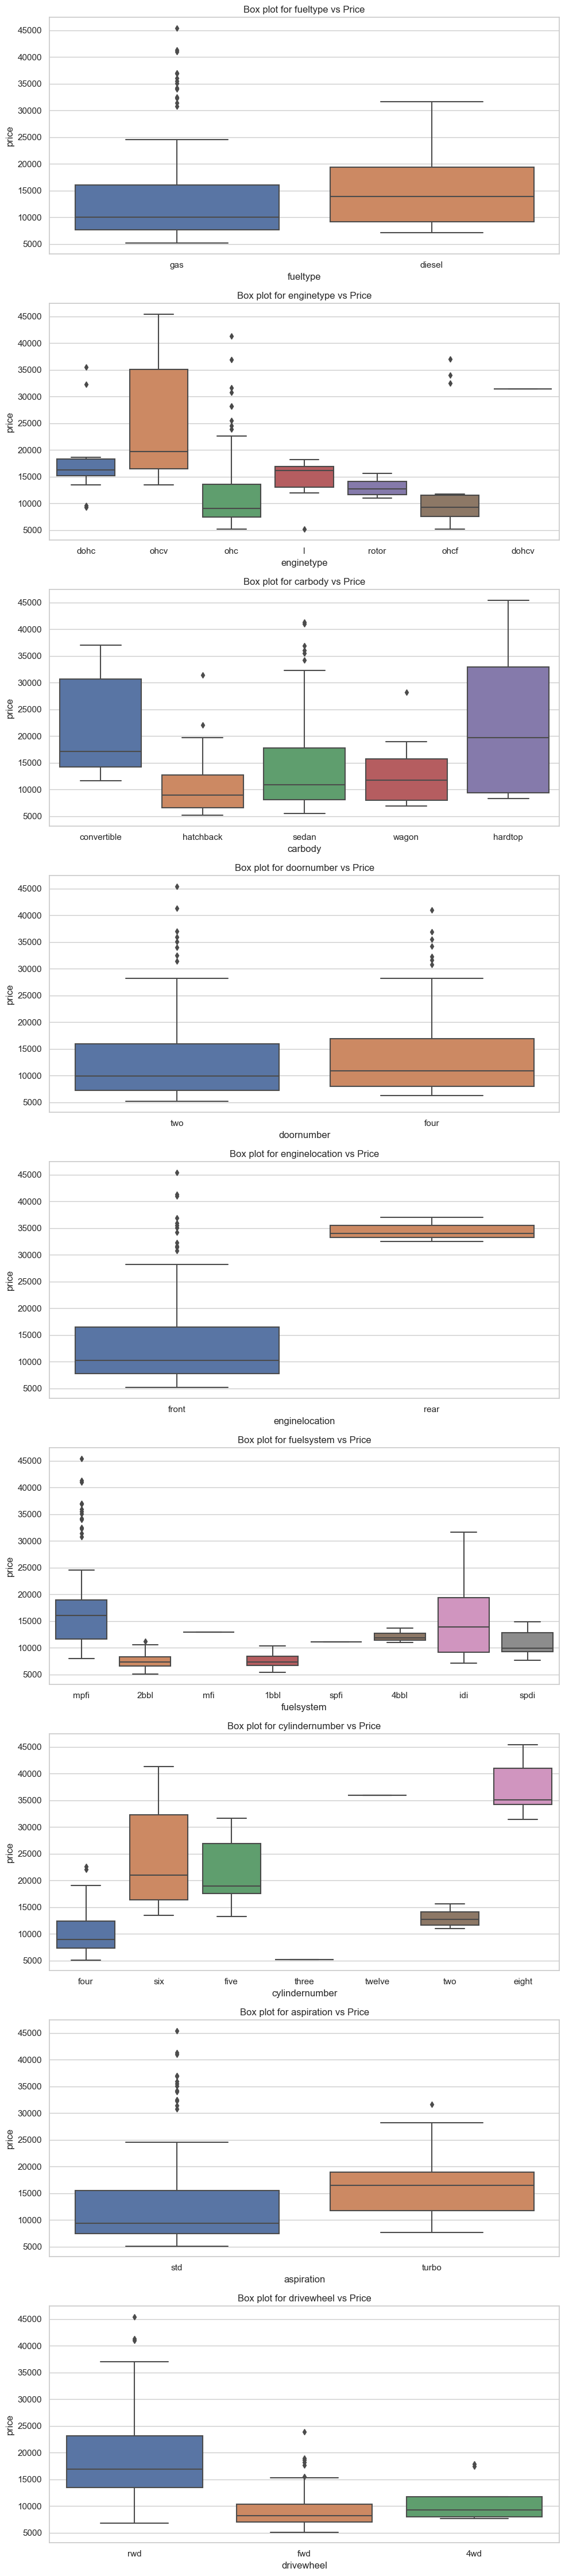

In [37]:
# Set the style for seaborn
sns.set(style = "whitegrid")

# Define the categorical variables to visualize
categorical_variables = [ 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows = len(categorical_variables), ncols = 1, figsize = (10, 5 * len(categorical_variables)))

# Plot box plots for each categorical variable against price
for i, variable in enumerate(categorical_variables):
    sns.boxplot(x = variable, y = 'price', data = data, ax = axes[i])
    axes[i].set_title(f'Box plot for {variable} vs Price')


# Adjust layout
plt.tight_layout()
plt.show()

# Feature selection and preprocessing

In [42]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Converting categorical data into numerical data

In [43]:
lb = LabelEncoder()

categorical_col = ['CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [44]:
upd_data = data.copy()
for i in categorical_col:
    print(i)
    upd_data[i] = lb.fit_transform(upd_data[i])

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [45]:
upd_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Correlation Matrix

In [46]:
corr_matrix = upd_data.corr()

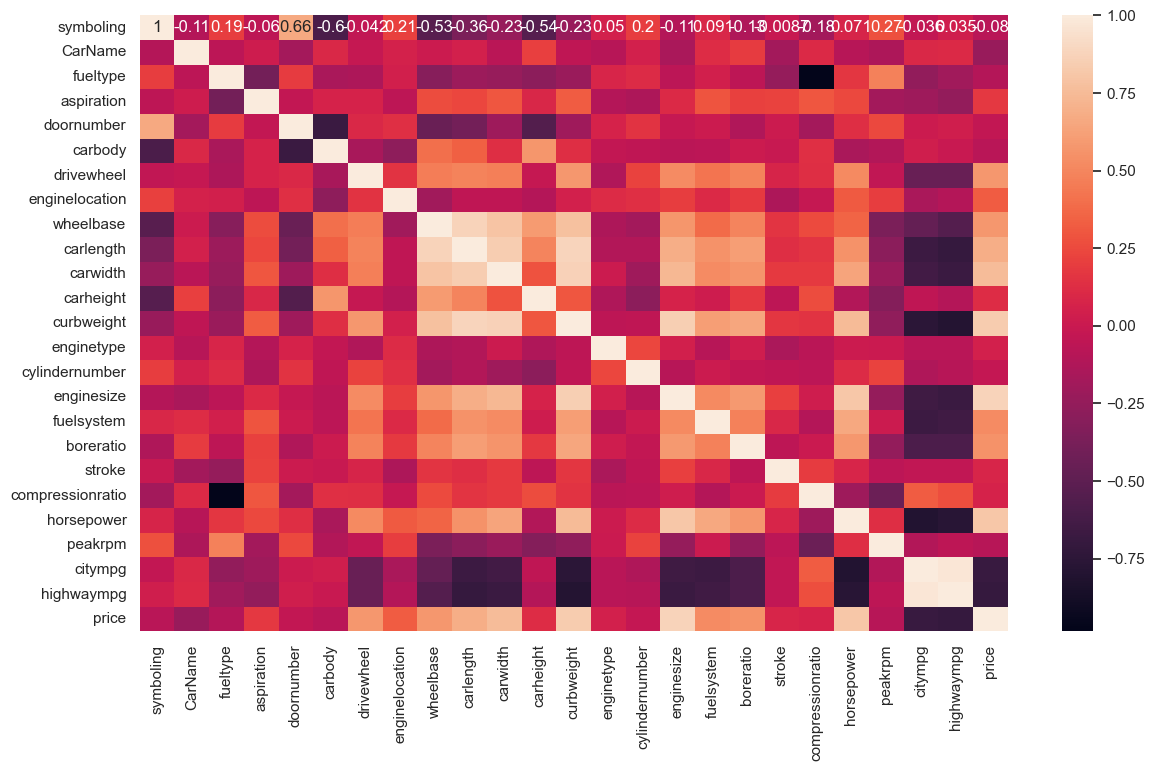

In [51]:
plt.figure(figsize = (14,8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Feature Selection 

In [54]:
features = upd_data[['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']]

In [55]:
X = features.drop('price', axis = 1)
y = features['price']

## Train Test Split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

## Feature Scaling

In [59]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

x_train_sc[:5]

array([[ 0.05413932,  0.35112344,  0.48112137, -0.53033009, -0.1800378 ,
        -0.61305703,  0.42761856,  1.06753367,  0.3248247 , -0.11023152,
         0.72915867,  0.13648592,  0.09068492],
       [ 0.05413932,  0.35112344, -0.67923017, -0.53033009, -0.1800378 ,
        -0.61305703,  0.325631  ,  1.06753367,  0.3248247 , -0.11023152,
        -2.8901519 ,  0.13648592,  0.09068492],
       [ 0.05413932,  0.35112344,  0.48112137, -0.53033009, -0.1800378 ,
        -0.61305703, -0.15830995,  0.14028827, -0.30993814, -0.39553664,
        -0.68237246, -0.08489125, -0.35790034],
       [ 0.05413932,  0.35112344, -0.67923017, -0.53033009, -0.1800378 ,
        -0.61305703, -0.84422627, -0.61309862, -0.70056143, -0.70677858,
        -0.53760003, -0.84741261, -0.49592657],
       [ 0.05413932, -2.84800125, -0.67923017, -0.53033009, -0.1800378 ,
        -0.61305703, -0.5382636 , -0.61309862, -0.70056143, -0.39553664,
        -0.24805519, -1.19177709, -0.49592657]])

# Model Building

In [60]:
clf = LinearRegression()

clf.fit(x_train_sc, y_train)

LinearRegression()

In [62]:
clf.score(x_test_sc, y_test)

0.8201850946458787

## Making predictions on test data

In [63]:
y_pred = clf.predict(x_test_sc)

# Accuracy Metrics

In [64]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MSE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 14855693.379616229
Mean Absolute Error (MSE): 2724.8421357698107
R-squared (R2): 0.8201850946458787


# Actual Price vs the predicted price

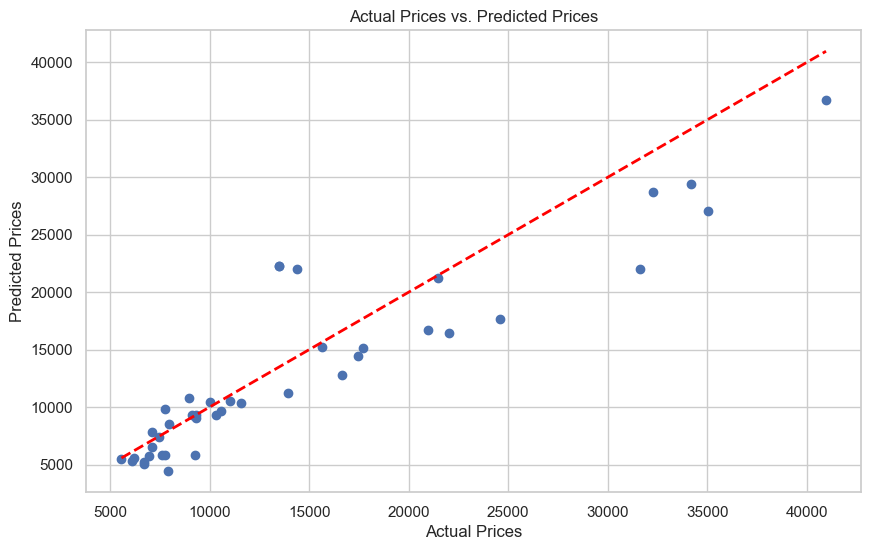

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()